In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [22]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [15]:
# set configuration
sample_size = 100
nr_sample = 20
nr_moments = 6

# classificatio
test_size = 0.2
cv = 5
cv_config = [test_size, cv]

In [26]:
data = pd.read_csv('graphwave_ac_data.csv')

In [40]:
labels

array(['B5_0', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'C8_0', 'C8_1', 'C8_2',
       'C8_3', 'D5_0', 'D5_1', 'DB55_0', 'DB55_1', 'DS5_1', 'DS5_0',
       'H5_0', 'H5_1', 'H5_2', 'L5_0', 'L5_1', 'L5_2', 'L5_3', 'L5_4',
       'L5_5', 'L5_6', 'PB5_0', 'PB5_1', 'PB5_2', 'S5_0', 'S5_1', 'U5_0',
       'U5_1', 'U5_2', 'U5_3', 'U5_4', 'W5_0', 'W5_1', 'W5_2', 'W5_3'],
      dtype=object)

In [120]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1611,1612,1613,1614,1615,1616,1617,1618,1619,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B5_0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B5_0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B5_0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B5_0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B5_1


C:\Users\shfar\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


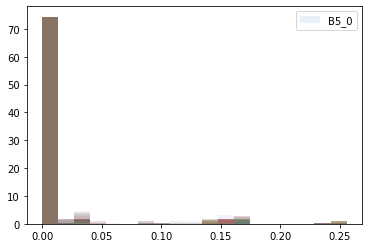

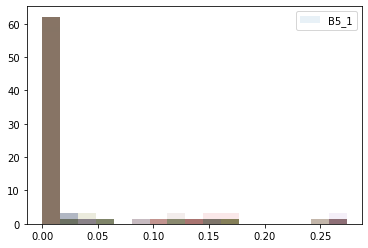

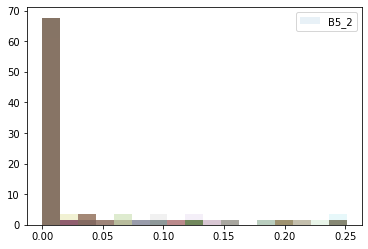

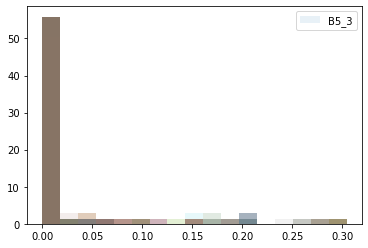

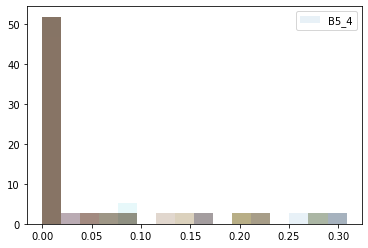

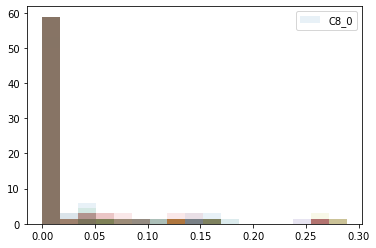

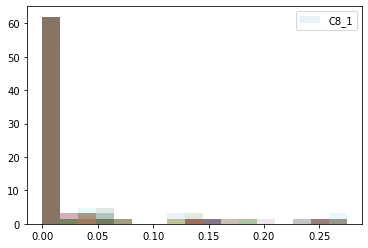

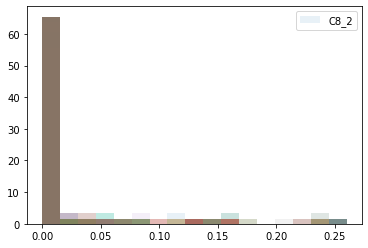

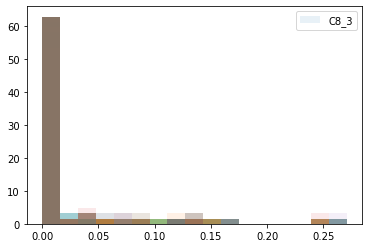

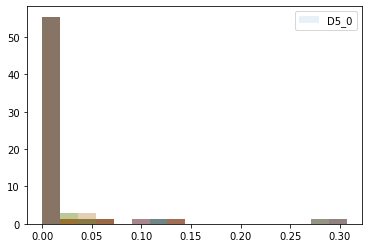

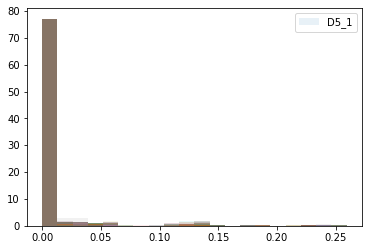

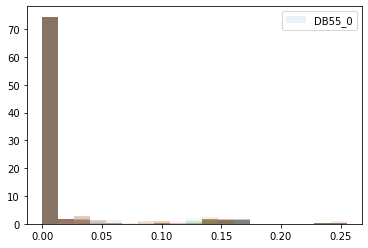

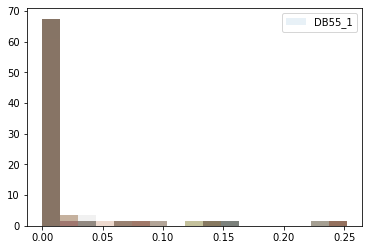

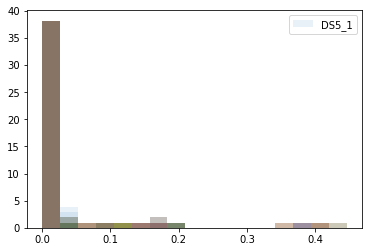

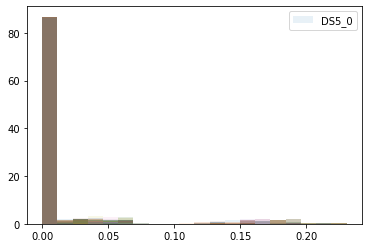

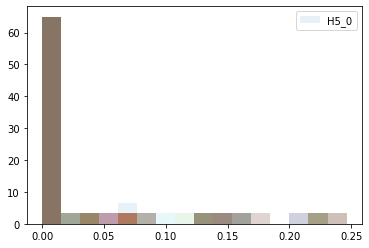

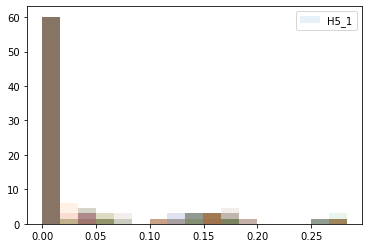

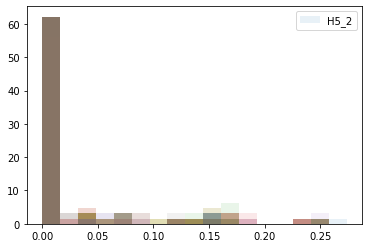

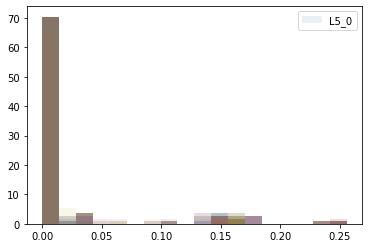

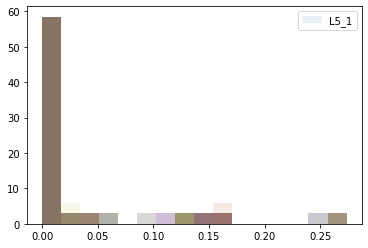

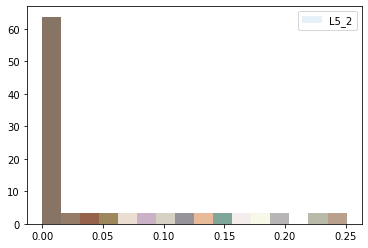

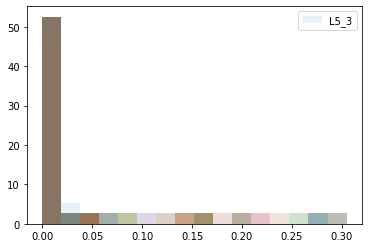

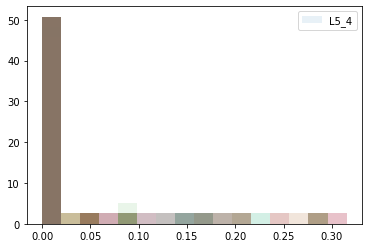

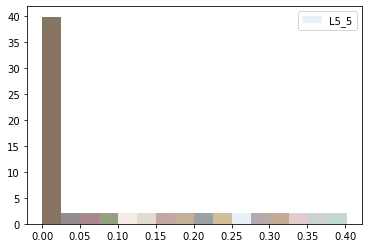

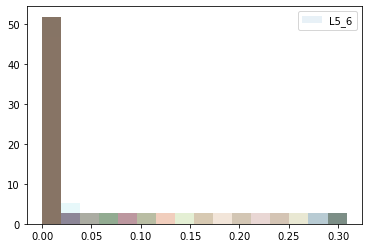

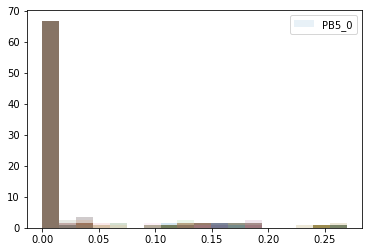

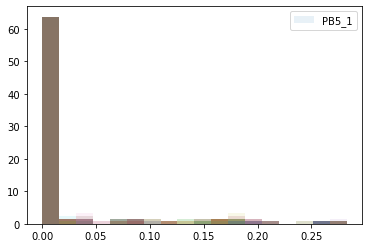

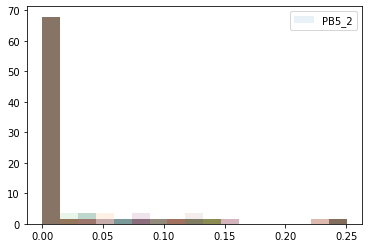

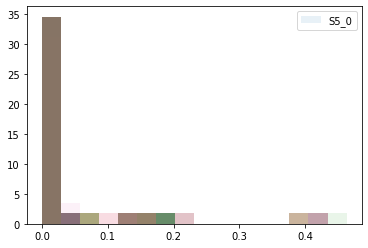

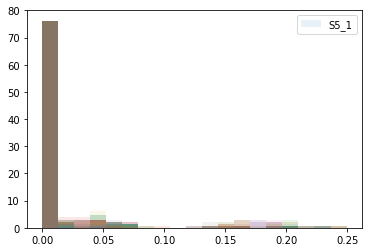

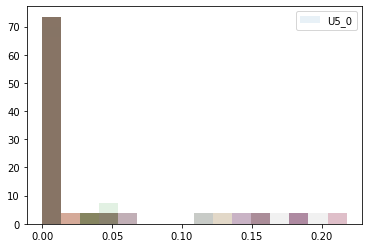

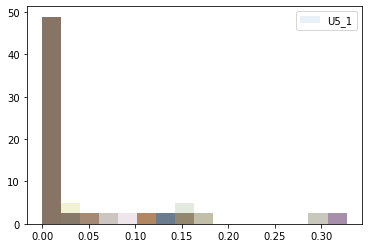

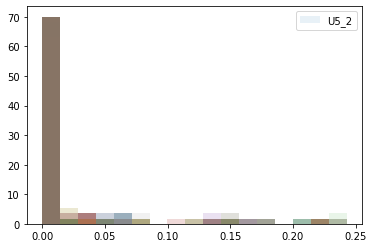

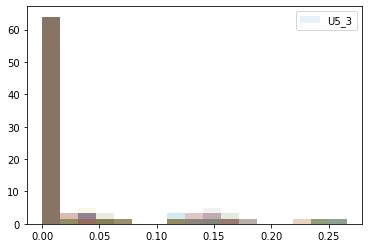

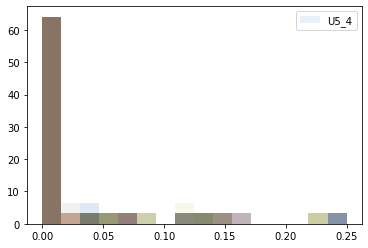

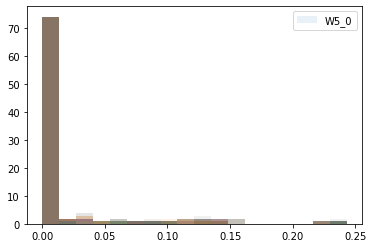

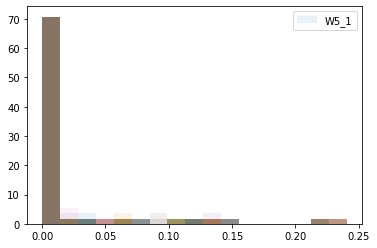

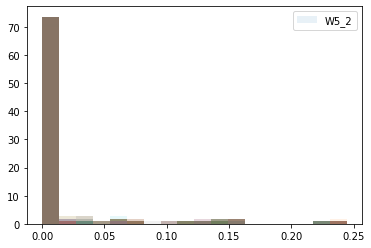

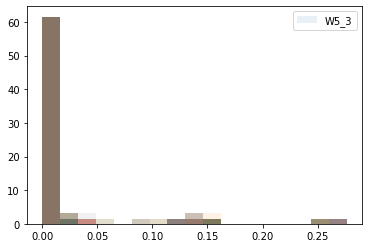

In [119]:
labels = data['label'].unique()
for i in labels:
    x = data.loc[data['label'] == i]
    x = x.iloc[:,:-1]
    fig, ax = plt.subplots()
    plt.hist(x, density=True, histtype='stepfilled', bins='auto', label=i, alpha=0.1)
    plt.legend()
    plt.show()

In [121]:
np.mean(data, axis = 1)

0       0.000678
1       0.000601
2       0.000601
3       0.000601
4       0.000769
          ...   
2135    0.000628
2136    0.000556
2137    0.000557
2138    0.000630
2139    0.000701
Length: 2140, dtype: float64

In [ ]:
def get_moments_df(samples_dict, nr_moments):
    # samples_dict: a dictionary containing samples of different distribution including preselected parameters
    # nr_moments: desired number of moments to be calculated

    m1 = list()
    df = pd.DataFrame()
    
    for i, (name, samples) in enumerate(samples_dict.items()):
        nr_sample = samples.shape[0]
        x = np.zeros((nr_moments - 1, nr_sample))
        m1.extend(np.mean(samples, axis=1))  # first moment

        for j in range(2,nr_moments+1): #calculate from 2nd moment
            x[j-2,:] = stats.moment(samples, j, axis=1)

        df_per_dist = pd.DataFrame(np.transpose(x), columns=['m'+str(i) for i in range(2,j+1)])
        df_per_dist['dist'] = name
        df = pd.concat([df,df_per_dist], ignore_index=True)

    m1_df = pd.DataFrame(m1, columns=['m1'])    
    final_df = pd.concat([m1_df,df], axis=1)

### Bounded distributions

In [4]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [79]:
bounded_samples.values()

dict_values([array([[0.87642417, 0.00106219, 0.7038201 , ..., 0.40750361, 0.22979984,
        0.53107699],
       [0.62150751, 0.94827443, 0.01139836, ..., 0.90777763, 0.2747048 ,
        0.02138888],
       [0.91644563, 0.89008427, 0.33569393, ..., 0.72029079, 0.0078915 ,
        0.20291938],
       ...,
       [0.09207569, 0.05179281, 0.16238323, ..., 0.08023609, 0.63934267,
        0.30037018],
       [0.78212722, 0.99668195, 0.06484932, ..., 0.03003725, 0.99999191,
        0.7875196 ],
       [0.94040596, 0.01162694, 0.08341812, ..., 0.43150889, 0.99307382,
        0.00355161]]), array([[0.46232407, 0.3154303 , 0.18700531, ..., 0.3140926 , 0.06312444,
        0.8050722 ],
       [0.01147831, 0.09205627, 0.25932345, ..., 0.0346484 , 0.11663562,
        0.66950471],
       [0.11187875, 0.01262181, 0.16042239, ..., 0.15382034, 0.02887869,
        0.02348216],
       ...,
       [0.36019684, 0.39307553, 0.2562636 , ..., 0.38189677, 0.58229232,
        0.03810768],
       [0.25614744, 0

In [73]:
for label, (name, samples) in enumerate(data.items()):
    print(label)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
moments_df = dem.get_moments_df(bounded_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,dist
0,0.482645,0.114165,0.003148,0.020997,0.001203,0.004389,arcsine
1,0.458979,0.116094,0.001410,0.020918,0.001041,0.004205,arcsine
2,0.516576,0.133172,-0.000506,0.025223,-0.000697,0.005299,arcsine


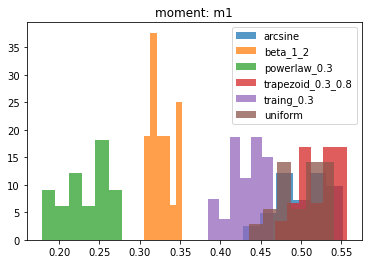

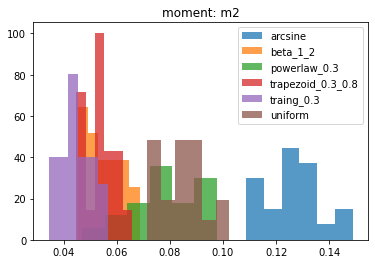

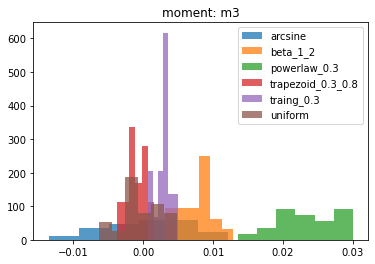

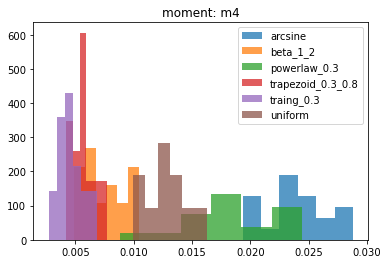

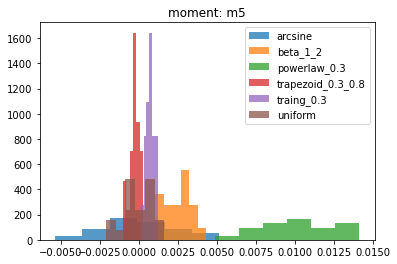

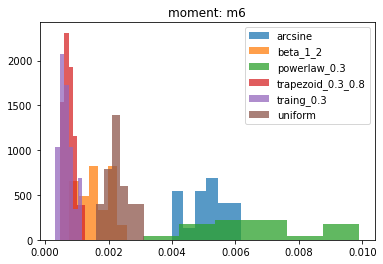

In [7]:
dem.get_histogram_of_moments(moments_df)

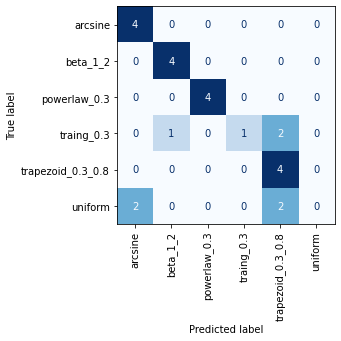

array([0.9       , 0.73684211, 0.68421053, 0.73684211, 0.89473684])

In [11]:
cm.rr_model(moments_df, 0.2, 5, plot=1)

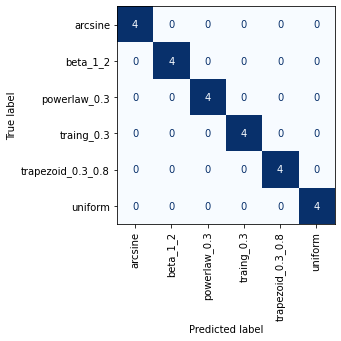

array([1.        , 1.        , 1.        , 0.94736842, 1.        ])

In [12]:
cm.svm_model(moments_df, test_size, cv, plot=1)

for loop for sample size:   0%|          | 0/9 [00:00<?, ?it/s]

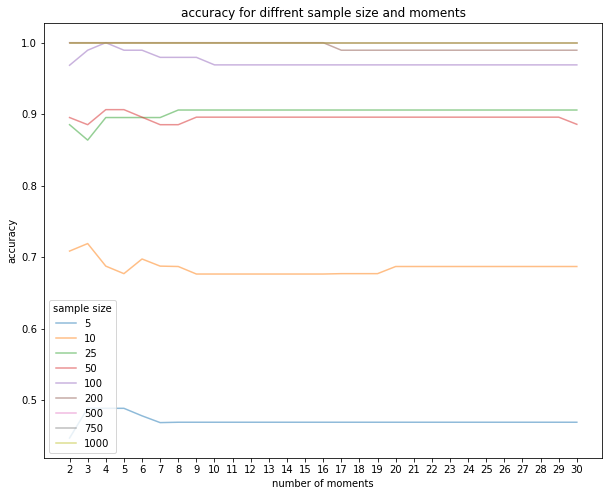

In [20]:
sample_size_list = [5, 10, 25, 50, 100, 200, 500, 750, 1000]
nr_moments_list = list(range(2,31))
acc = cm.cv_moments_sample_size(sample_size_list, nr_moments_list, bounded_dists, 20, cv_config, 1)

% completed:   0%|          | 0/9 [00:00<?, ?it/s]

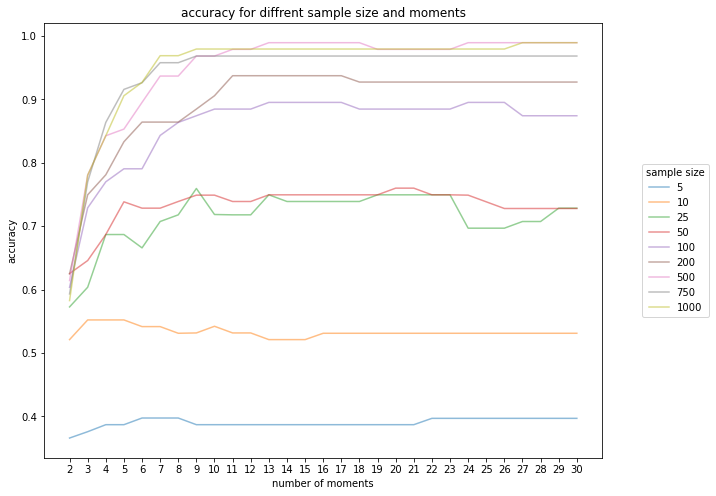

In [23]:
acc = cm.cv_moments_sample_size(sample_size_list, nr_moments_list, bounded_dists, 20, cv_config, 2)

### Heavytail distributions

In [14]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(heavytail_samples)

In [104]:
moments_df = dem.get_moments_df(heavytail_samples, nr_moments)
moments_df.head()

,m1,m2,m3,m4,m5,m6,dist
0,2.779658,6.421961e+01,5.452421e+03,6.362051e+05,8.039403e+07,1.042470e+10,cauchy
1,5.607938,8.720941e+02,2.990430e+05,1.195444e+08,5.059714e+10,2.209249e+13,cauchy
2,3.745959,1.512678e+02,1.866896e+04,3.112581e+06,5.694318e+08,1.079513e+11,cauchy
3,132.579376,7.789537e+06,4.840328e+11,3.016346e+16,1.879722e+21,1.171403e+26,cauchy
4,4.825650,9.782384e+02,5.157588e+05,3.112724e+08,1.930869e+11,1.206007e+14,cauchy


In [105]:
transformed_sampels = dict()
for name, samples in heavytail_samples.items():
    transformed_sampels[name] = np.log1p(samples)
    
moments_df = dem.get_moments_df(transformed_sampels, nr_moments)
moments_df.head()

,m1,m2,m3,m4,m5,m6,dist
0,0.876862,0.559737,0.685496,2.072027,5.649270,17.900205,cauchy
1,0.935783,0.840612,1.687084,6.720574,26.717583,116.583803,cauchy
2,0.943585,0.711344,1.041983,3.381649,10.178257,34.739602,cauchy
3,0.965178,0.987189,3.619379,28.084757,245.103487,2304.865109,cauchy
4,0.864410,0.732931,1.500664,5.888309,23.960615,108.690952,cauchy


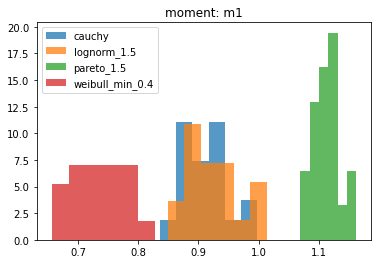

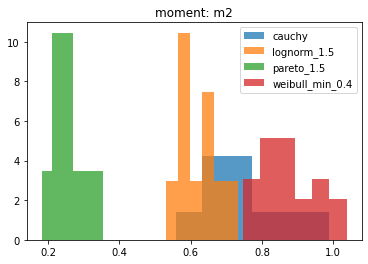

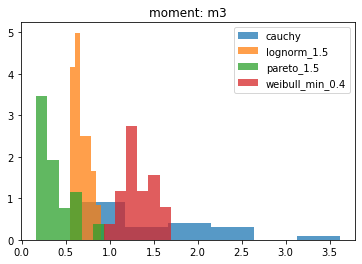

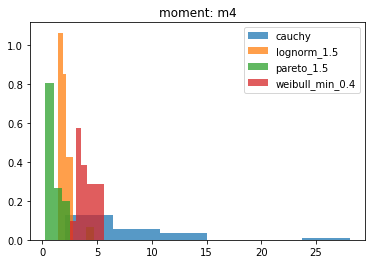

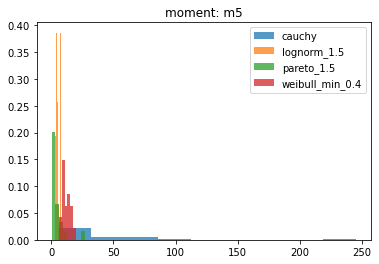

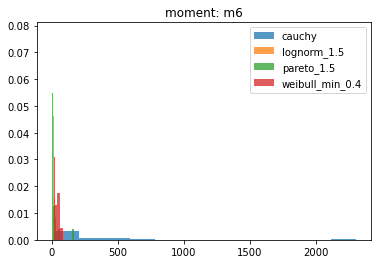

In [106]:
dem.get_histogram_of_moments(moments_df)

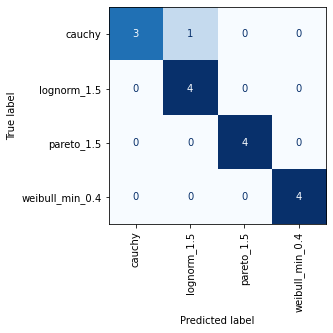

array([0.92307692, 0.92307692, 1.        , 1.        , 1.        ])

In [107]:
cm.svm_model(moments_df, test_size, cv, plot=1)

In [95]:
sample_size_list = [5, 10, 25, 50, 100, 150, 200, 500, 750, 1000]
nr_moments_list = list(range(2,31))
acc = cv_moments_sample_size_ht(sample_size_list, nr_moments_list, heavytail_dists)

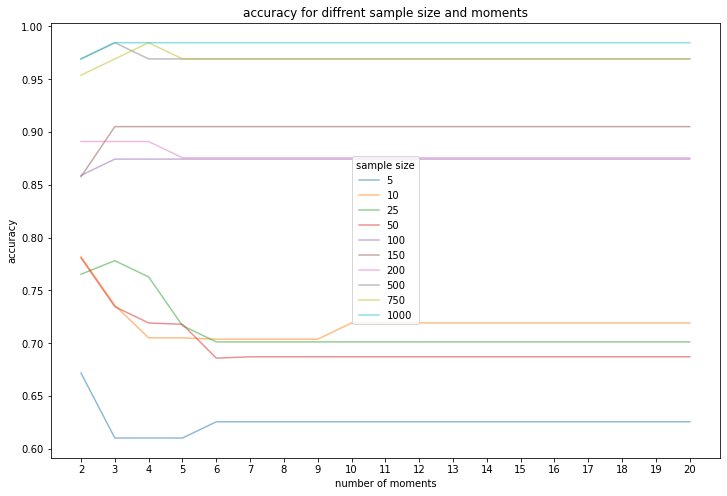

In [96]:
plt.figure(figsize=(12, 8))
for i in range(len(acc)):
    plt.plot(nr_moments_list, acc[i], label=str(sample_size_list[i]), alpha = 0.5)
    plt.title('accuracy for diffrent sample size and moments')
    plt.xlabel('number of moments')
    plt.ylabel('accuracy')
    plt.legend(title='sample size')
    plt.xticks(np.arange(min(nr_moments_list), max(nr_moments_list)+1, 1.0))
plt.show()

In [92]:
def cv_moments_sample_size_ht(sample_size_list, nr_moments_list, dists):
    acc = list()
    for i in sample_size_list:
        samples = dm.get_samples(dists, nr_sample, i)
        tr_sampels = dict()
        for name, sample in samples.items():
            tr_sampels[name] = np.log1p(sample)
        acc_ = [] 

        for j in nr_moments_list:
            df = dem.get_moments_df(tr_sampels, j)
            score = cm.svm_model(df, test_size, cv)
            acc_.append(score.mean())

        acc.append(acc_)
    return acc